## 3.1 パーセプトロンからニューラルネットワークへ

**ニュートラルネットワークはパーセプトロンの発展系**


In [19]:
# 復習
# ｂはバイアスと言われるもので、発火のしやすさをコントロールするもの。

def perceptron(x1: int, x2: int) -> int: 
    b = -1
    w1, w2 = 1, 1
    result = b + w1*x1 + w2*x2
    if(result > 0):
        return 1
    else: 
        return 0
    
"""
活性化関数
a = b+w1x1+w2x2
となる、aがあったときh(a)を活性化関数と呼びh(a)の値によって出力が変わる。
例えば、
a= 2
h(a)
if(h(a) > 1):
    return 1
else:
    return 0
"""

def activation_func(a: int) -> int:
    if a > 1:
        return 1
    else:
        return 0

a = 2
print(f"activation_func, in: {a},  out: {activation_func(a)}")

# ※ちなみにこの本ではx1, x2などの重み付けされる前の変数のことを「ニューロン/ノード」と呼ぶ。

activation_func, in: 2,  out: 1


## 3.2 活性化関数

step, in: np.array([-0.1, 1.0, 2.0]), out: [0 1 1]



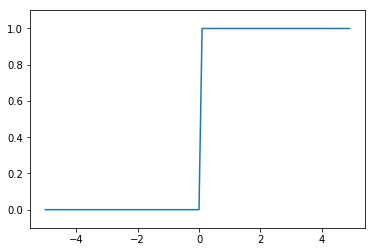

sigmoid, in: np.array([-0.1, 1.0, 2.0]), out: [0.47502081 0.73105858 0.88079708]



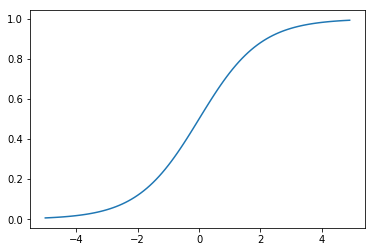

relu, in: np.array([-0.1, 1.0, 2.0]), out: [0. 1. 2.]



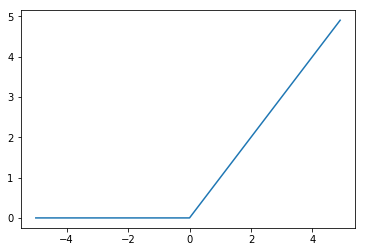

In [41]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# ステップ関数
# - パーセプトロンで使われている活性化関数
def step_function(x):
    if(x > 0):
        return 1
    else:
        return 0

# Numpy配列に対応したステップ関数
# np.array([-0.1, 1.0, 2.0])のような配列を渡すことが可能になる。
def step(x):
    return np.array(x > 0, dtype=np.int)

print(f"step, in: np.array([-0.1, 1.0, 2.0]), out: {step(np.array([-0.1, 1.0, 2.0]))}\n")
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲指定
plt.show()


# シグモイド関数
# - 出力が滑らかなS字になる活性化関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(f"sigmoid, in: np.array([-0.1, 1.0, 2.0]), out: {sigmoid(np.array([-0.1, 1.0, 2.0]))}\n")

y = sigmoid(x)
plt.plot(x, y)
plt.show()

# ReLU関数(最近よく使われる)
def relu(x):
    return np.maximum(0, x)

print(f"relu, in: np.array([-0.1, 1.0, 2.0]), out: {relu(np.array([-0.1, 1.0, 2.0]))}\n")

y = relu(x)
plt.plot(x, y)
plt.show()

# ・活性化関数は非線形関数である必要がある
# 何故なら線形関数だと、隠れ層なしで同じ結果を表現できてしまうから。

## 3.3 多次元配列の計算

In [50]:
# 行列の定義
a = np.array([[1, 2], [3, 4]])

# 次元（下の場合 2)を返す
print(f"dim: {np.ndim(a)}")


# 要素数（次元）(下の場合、2個上で定義したaを処理しているので(2, 2))を返す
print(f"shape: {a.shape}")

# (二次元の場合「塊の個数、各塊の中にある要素の個数」となる）
# ※ここは法則がややこしいのでP５５の下の方の例を要参照



# 行列の積（仕組みは省略）
# aの行列 * bの行列↓
b = np.array([[-1, 2], [2, -3]])
print(f"dot: {np.dot(a, b)}")

# ニュートラルネットワークの行列の積
# この行列を使うことで多くの掛け算の結果を一度に計算することができる。

x = np.array([1, 2])
x.shape

dim: 2
shape: (2, 2)
product: [[ 3 -4]
 [ 5 -6]]


## 3.4 3層ネットワークの実装

### ネットワークを表すために使う記号(本節のみで使用)
#### `重み: axy(z)`
y層からx層へのz層のニューロンa


e.g. w12(1)は前層の2番目のニューロンから次層1番目のニューロンへの第1層にある重み

#### `ニューロン: ax(y)`
aはy層、x番目のニューロン
e.g. a2(1)は第1層2番目のニューロン


In [64]:
# 第1層目
x = np.array([1.0, 0.5]) # 入力
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 重み
b1 = np.array([0.1, 0.2, 0.3]) # バイアス

print(f"x.shape: {x.shape}")
print(f"w1.shape: {w1.shape}")
print(f"b1.shape: {b1.shape}")

# 入力に重みをかけて、バイアスを足す
a1 = np.dot(x, w1) + b1
print(f"a1(第1層重み付き和): {a1}")

# 活性化関数に入れて、出力を出す
z1 = sigmoid(a1)
print(f"z1(第1層出力): {z1}\n")


# 第2層目
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

a2 = np.dot(z1, w2) + b2 # 第1層めの出力が入力になっている
print(f"a2(第2層重み付き和): {a2}")

z2 = sigmoid(a2)
print(f"z2(第2層出力): {z2}\n")

# 出力層
# 恒等関数: 入力をそのまま出力として返す

# 出力層の活性化関数
# - 回帰問題: 恒等関数
# - 2クラス分類: シグモイド関数
# - 多クラス分類: ソフトマックス関数
def identity_func(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])
a3 = np.dot(z2, w3) + b3
y = identity_func(a3) # 出力
print(f"最終出力: {a3}")

x.shape: (2,)
w1.shape: (2, 3)
b1.shape: (3,)
a1(第1層重み付き和): [0.3 0.7 1.1]
z1(第1層出力): [0.57444252 0.66818777 0.75026011]

a2(第2層重み付き和): [0.51615984 1.21402696]
z2(第2層出力): [0.62624937 0.7710107 ]

最終出力: [0.31682708 0.69627909]


In [114]:
def identity_func(x):
    return x

# 参考書の実装
def init_network():
    network = {}
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network


def forword(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    print(f"a1: {a1}")
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    print(f"a2: {a2}")
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    print(f"a3: {a3}")
    y = identity_func(a3)
    return y

network = init_network()
x =  np.array([1.0, 0.5])
output = forword(network, x)
print(f"参考書実装の出力: {output}\n")

# ちょっと改良
def init_network2():
    network = [
        { 'w': np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]), 'b': np.array([0.1, 0.2, 0.3])},
        { 'w': np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]), 'b': np.array([0.1, 0.2])},
        { 'w': np.array([[0.1, 0.3], [0.2, 0.4]]), 'b': np.array([0.1, 0.2])}
        
    ]
    return network

def forword2(network, x):
    cur_x = x
    for i, layer in enumerate(network):
        a = np.dot(cur_x, layer['w']) + layer['b']
        print(f"a{i}: {a}")
        if i == (len(network) - 1):
            cur_x = identity_func(a)
        else: 
            cur_x = sigmoid(a)
    return cur_x

network2 = init_network2()
x = np.array([1.0, 0.5])
output2 = forword2(network2, x)
print(f"改良版の出力: {output2}")

a1: [0.3 0.7 1.1]
a2: [0.51615984 1.21402696]
a3: [0.31682708 0.69627909]
参考書実装の出力: [0.31682708 0.69627909]

a0: [0.3 0.7 1.1]
a1: [0.51615984 1.21402696]
a2: [0.31682708 0.69627909]
改良版の出力: [0.31682708 0.69627909]


## 3.5 出力層の設計
### `機械学習の種類`
分類問題：あるデータからそれが男性か女性かを分類するもの
回帰問題：人が写った画像からその人の体重を予測するもの
### `恒等関数`
変数を受け取って、なんの加工もしないで出力する関数
### `ソフトマックス関数`
分類問題に用いる関数。指数関数を扱う。分母はすべての入力信号の指数関数の和から構成される。つまり、入力されたデータを加工し、しかも複数の入力データを扱う。

In [7]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #指数関数:e(ネイピア数)の「"入力値"乗」する。つまりeの0.3乗、eの2.9乗、eの4乗。
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [8]:
sum_exp_a = np.sum(exp_a) #指数関数の和
print(sum_exp_a)

74.1221542101633


In [14]:
y = exp_a / sum_exp_a #それぞれの指数関数が合計の何％占めているかの計算
print(y)

[0.01821127 0.24519181 0.73659691]


### `注意点`
下のようにeの1000乗などとするとinfinityと出力されて数値が出てこない

In [15]:
print(np.exp(1000))

inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


### `logという回避方法`
$$e ^{1000} $$は$$\log_e {1000} = 1000 $$ となり限られた文字数で表現できるようになる。

In [19]:
a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a)) #ソフトマックス関数の計算

#この計算だと、桁が大きすぎてエラーになる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [20]:
c = np.max(a) #maxは配列から最大値を取り出す
a-c

array([  0, -10, -20])

In [35]:
np.exp(a-c)/np.sum(np.exp(a-c))#この計算が一体何を意味するのかは不明

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

下で実装する

In [34]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)#桁が大きすぎても計算できるための工夫
    sum_exp_a = np.sum(exp_a)
    y = exp_a/ sum_exp_a
    return y
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


## ソフトマックス関数のニューラルネットワークへの応用例

In [38]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) #ソフトマックス関数の説明で出てきた計算の実装例


[0.01821127 0.24519181 0.73659691]


In [41]:
np.sum(y)

1.0

このことが意味するのはニューラルネットワークにおいてソフトマックス関数の出力の総和は１になること。**つまりこの出力を確率として扱うことができるようになる。**加工したとしても大小関係は変わらないのも特徴（※これは、expが単調増加することに起因する）。それ故、「分類問題」のときに有用。
また、出力層のニューロンの数（何個に分類するのか）は適宜決める必要ある。

## 3.6 手書き数字認識

ここではMNISTデータセットと学習済みのパラメータを使ってニューラルネットワークの「推論処理」だけを実装する。

### `MINISTとは`
手書き数字の画像セット



dataset downloaded: (60000, 784)
Sample image: 5


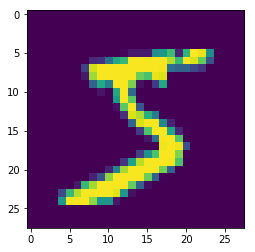

In [35]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from dataset.mnist import load_mnist
%matplotlib inline

def img_show(img):
    # Numpyとして格納された画像データをデータオブジェクトに変換
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(f"dataset downloaded: {x_train.shape}")

img = x_train[0]
label = t_train[0]
print(f"Sample image: {label}")

# load_mnistでflatten=Trueにしているので、1次元の画像となっている。
# そのため、ここで28x28に戻す必要がある。
img = img.reshape(28, 28) 
img_show(img)



In [36]:
import pickle

def sigmoid(x):
    # np.exp(-x) == eの-x乗
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)#桁が大きすぎても計算できるための工夫
    sum_exp_a = np.sum(exp_a)
    y = exp_a/ sum_exp_a
    return y

def get_img_data():
    # flatten=Trueは1次元の配列を返す(Falseだと1x28x28の3次元配列)
    # normalize=Trueは画像を0.0~1.0に正規化する(Falseだと0~255)
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)
    
    return y

# xが入力画像、tが答え(0~9)
x, t = get_img_data()
network = init_network()
predicted_cnt = 0
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1
    predicted_cnt += 1
        
print(f"Predicted Images: {predicted_cnt}, Accuracy: {float(accuracy_cnt) / len(x)}")

Predicted Images: 10000, Accuracy: 0.9352


### 正規化と前処理

#### `前処理`
入力データを事前に変換しておくこと。識別性能の向上や学習の高速化などが図れる。

#### `正規化`
データをある決まった範囲に変換する処理。

上記の手書き数字認識のデータを取得する`load_mnist`では、`normalize=True`を指定して、1-255ピクセルのデータを`0.0-1.0`の範囲に収まるように正規化する前処理を行なった。

### バッチ処理による実装
さっきは`for文`で画像を1枚ずつ入力データを回したが、一度に100枚の画像を入れたほうが計算速度が速くなる。(計算ライブラリは大きな配列の計算を効率よく処理できるよう最適化されているため。)。

このひとまとまりの入力データを`バッチ`と呼び、一度に複数のデータを処理することを`バッチ処理と呼ぶ。`

In [41]:
# バッチ処理による、手書き数字認識
x, t = get_img_data()
batch_size = 100
predicted_cnt = 0
accuracy_cnt = 0

# batch_size毎にループを回す。0, 100, 200, ...len(x) - 100
for i in range(0, len(x), batch_size):
    # 配列xからバッチサイズ分取り出す。0-99, 100-200, ...(len(x) - 100)-(len(x) - 1)
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    # axisは軸とする次元を指定する。(よく理解できていない)
    # aixsの理解に役立つリンク: https://qiita.com/shuetsu@github/items/2bf8bba233c5ecc7a0ad
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
predicted_cnt += 1
    
print(f"Predicted Images: {predicted_cnt}, Accuracy: {float(accuracy_cnt) / len(x)}")

Predicted Images: 1, Accuracy: 0.9352
